<a href="https://colab.research.google.com/github/brendenwest/ad450/blob/master/9_tree_based_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Tree-based Models

### Reading
- Geron - chapter 6 ([Decision trees](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch06.html#trees_chapter)) & chapter 7 ([Ensembles](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch07.html#ensembles_chapter))

### Tutorials
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- https://www.datacamp.com/community/tutorials/kaggle-tutorial-machine-learning (Decision Tree Classifiers)
- https://www.datacamp.com/community/tutorials/random-forests-classifier-python


### Learning Outcomes
- Decision Tree models
- Methods for splitting datasets at tree nodes
- Visualizing & interpreting Decision Trees
- Regularizing Decision Tree modules
- Using Decision Trees for regression
- Ensemble learning
- Random forests


# Decision Trees

Decision Trees are flowchart-like tree structures, where each node represents a feature (attribute). Branches represent a decision rule and each leaf node represents the decision outcome.

Decision Trees are calle **white-box models** because you can check the calculations used to make their predictions.


**Pros:**
- does not depend on assumptions about data distribution. Requires little data preparation.
- training time is faster than more complex ML algorithms
- Easy to interpret & visualize
- can easily capture non-linear patterns
- can handle high-dimensional data with good accuracy
- can be used for feature engineering 

**Cons:**
- sensitive to noisy data & prone to overfit
- sensitive to variation in dataset (can be addressed with **bagging** & **boosting**)
- biased with unbalanced dataset


## How Decision Tree Algorithms Work

Decision Tree algorithms:

1.   Select the best attribute for splitting the dataset, using an Attribute Selection Measure (ASM)
2.   Make that attribute a decision node & partition the dataset on it
3.   Repeat this process recursively for each child node until one of these conditions match:
     - all tuples belong to the same attribute value
     - there are no more attributes
     - there are no more instances

### Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.

### Computational Complexity

The Decision Tree training algorithm compares all features (or less if max_features is set) on all samples at each node. This results in a training complexity of O(n × m log(m)). For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data, but this slows down training considerably for larger training sets.

Making predictions requires traversing the Decision Tree from the root to a leaf. Since Decision Trees are generally approximately balanced, predictions require going through roughly O(log2(m)) nodes, and checking only one feature at each node. So predictions are very fast and independent of the number of features, even when dealing with large training sets.


## Attribute Selection Measures (ASM)

Refers to methods for partitioning a dataset in the way that best explains it. 

Each attribute is ranked by how well it explains the dataset, and the attribute with the best score is selected.

For attributes with continuous values, it's necessary to define split points.

### Gini Index

Scikit-Learn uses a Gini **impurity** measure by default. A node attribute's gini measure is “pure” (gini=0) if all training instances it applies to belong to the same class.

### Information Gain

Information gain is a decrease in **entropy** (randomness or impurity) in a dataset. A dataset’s entropy is zero when it contains instances of only one class

The Information Gain ASM computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

The attribute with highest information gain - at a given decision node - is chosen as the splitting attribute.

Information Gain is biased for the attribute with a large number of distinct values.

### Gain Ratio

Gain ratio handles the issue of bias by normalizing the information gain using Split Info.

Gini impurity & entropy measures usually lead to similar trees. Gini impurity is slightly faster to compute, but tends to isolate the most frequent class in its own branch of the tree. Entropy tends to produce slightly more balanced trees.


## Classification And Regression Tree (CART)

Scikit-Learn uses the CART algorithm to train Decision Trees. 

This algorithm produced a **binary tree**. by first splitting the training set into two subsets using a single feature k and a threshold $t_{k}$. It chooses k & searches for the data pair (k, $t_{k}$) that produces the purest subsets (weighted by their size).

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.

The CART algorithm is a **greedy** algorithm that searches for an optimum split at the top level, then repeats the process at each sub level.

## Decision Tree Regularization

Scikit-Learn offers a number of regularization **hyperparameters** to restrict the Decision Tree’s freedom during training & avoid **overfitting**.

- max_depth - maximum tree height
- min_samples_split 
- min_samples_leaf
- max_leaf_nodes
- max_features (maximum number of features evaluated for splitting at each node)

The min_* and max_* hyperparameters also restrict the shape of the Decision Tree.


## Visualizing Decision Trees

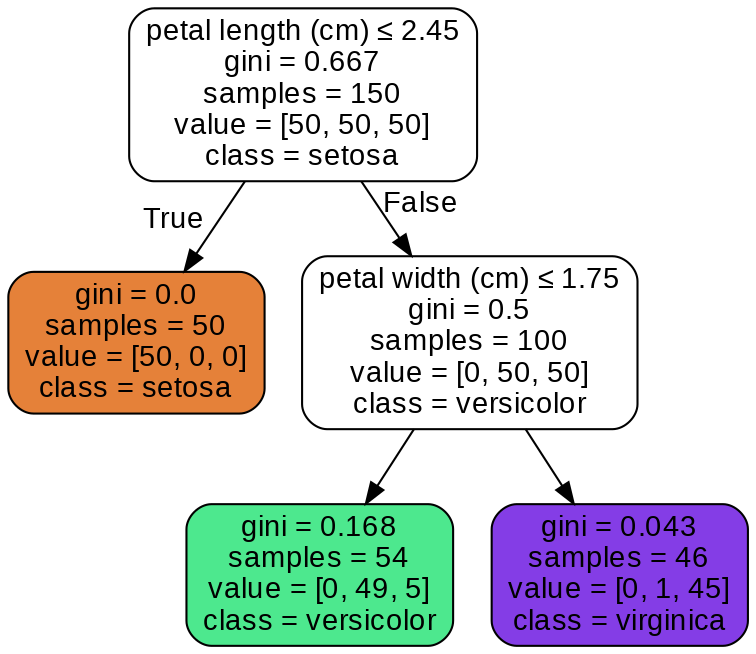

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

# export_graphviz function converts a decision tree classifier into a .dot file 
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf, 
    out_file='tree.dot',
    filled=True, 
    rounded=True,
    special_characters=True,
    feature_names = iris.feature_names[2:],
    class_names=iris.target_names,
    )

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=150'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

For each node, the tree image shows:
- ASM (gini or others)
- \# of samples in that leaf
- predicted class

For parent nodes, the tree image also shows feature & value used for determining child nodes. 

## Decision Tree Regression

Decision Trees are also capable of performing regression tasks. 

Scikit-Learn's DecisionTreeRegressor algorithm will predict a value and associated Mean Square Error (MSE) at each node. This prediction is the average target value of the training instances associated to this leaf node.

In this usage, the CART algorithm now tries to split the training set in a way that minimizes the MSE.


# Ensemble Learning

Aggregating the predictions of a group of predictors, will often result in  better predictions than with the best individual predictor. A group of predictors is called an **ensemble**; thus, this technique is called **Ensemble Learning**, and an Ensemble Learning algorithm is called an **Ensemble method**.

A **Random Forest** is an ensemble of Decision Tress, each trained on a different random subset of the training set. Predictions are made by collecting predictions of all individual trees, then predicting the class that gets the most votes.

**Voting Classifiers** can be ensembles of different classifiers and often achieve higher accuracy than the best individual classifier.

Ensemble methods work best when the predictors are as independent from one another as possible and make very different types of errors.



## Bagging & Pasting

Rather than use diverse classifiers, one can train the same algorithm on different random subsets of the training set. This approach can use:

- **bagging** - random sampling is performed with replacement. Allows training instances to be sampled several times for the same predictor
- **pasting** - random sampling is performed without replacement

After training, the ensemble can make a prediction on new instance by aggregating predictions of all predictors. 

The ensemble generally has a similar bias but a lower variance than a single predictor trained on the original training set.

Training & predictions can be performed in parallel, so bagging & pasting scale very well. Bagging often results in better models & is generally preferred.

### Out-of-Bag Evaluation

With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. The unsampled training instances are called **out-of-bag** (oob) instances.

Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation. The ensemble can be evaluated by averaging the oob evaluations of each predictor.


## Random Forests

A Random Forest is an ensemble of Decision Tress, generally trained via bagging method. 

Scikit-Learn has a convenience class - `RandomForestClassifier` - that combines functionality of DecisionTreeClassifier & BaggingClassifier.

Random Forests make it easy to measure the relative importance of each feature in the dataset, by computing how much the tree nodes using that feature reduce impurity on average (across all trees in the forest).

Generating predictions with Random Forests can be slow because all the trees in the forest have to make a prediction for the same given input and then perform voting on predictions.

Also the resulting model is difficult to interpret compared to a single decision tree.



## Boosting

**Boosting** refers to any Ensemble method that can combine several **weak learners** into a **strong learner**. These methods train predictors sequentially, with each trying to correct its predecessor. 

The most popular methods are Adaptive Boosting (AdaBoost) & Gradient Boosting.

**AdaBoost** has each new predictor pay a bit more attention to the training instances it's predecessor underfitted. So new predictors focus more and more on the hard cases.

**Gradient Boosting** tries to fit the new predictor to the residual errors made by the previous predictor.


## Stacking

Instead of using simple functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, stacking trains a model to perform this aggregation.

The final predictor (called a **blender**, or a **meta learner**) takes the initial predictions as inputs to make the final prediction.
